<a href="https://colab.research.google.com/github/Ashnig/Drug-model-based-on-reviews/blob/main/Drug_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the required libraries


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io


This step is for uploading the required file


In [ ]:
uploaded = files.upload()
df_0 = pd.read_csv(io.BytesIO(uploaded['merged.csv']))

df_0.head()

Saving merged.csv to merged.csv


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


Now we are going to analyze the data, in order to see how diverse our dataset is?

In [ ]:
df_0.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [ ]:
df = df_0.assign(Review = df_0.benefitsReview.astype(str) + ', ' + \
                 df_0.sideEffectsReview.astype(str) + ', ' + \
                 df_0.commentsReview.astype(str))

In [ ]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...
...,...,...,...,...,...,...,...,...,...
4138,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett..."
4139,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...
4140,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin..."
4141,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines..."


In [ ]:
df.describe()

,rating
count,4143.000000
mean,6.946416
std,2.948868
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        4143 non-null   object
 1   rating             4143 non-null   int64 
 2   effectiveness      4143 non-null   object
 3   sideEffects        4143 non-null   object
 4   condition          4142 non-null   object
 5   benefitsReview     4143 non-null   object
 6   sideEffectsReview  4141 non-null   object
 7   commentsReview     4135 non-null   object
 8   Review             4143 non-null   object
dtypes: int64(1), object(8)
memory usage: 291.4+ KB


In [ ]:
df.dtypes

urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
Review               object
dtype: object

In [ ]:
df.isnull().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
Review               0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()


urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
Review               0
dtype: int64

In [ ]:
#how many drugs do we have?

df['urlDrugName'].unique().tolist()

['biaxin',
 'lamictal',
 'depakene',
 'sarafem',
 'accutane',
 'carbamazepine',
 'ultram-er',
 'klonopin',
 'effexor',
 'lyrica',
 'valtrex',
 'provigil',
 'maxalt',
 'xanax',
 'chantix',
 'ranitidine',
 'prednisone',
 'augmentin',
 'zyrtec',
 'methotrexate',
 'fosamax',
 'propranolol',
 'premarin',
 'lovenox',
 'effexor-xr',
 'tirosint',
 'lexapro',
 'renova',
 'cymbalta',
 'omnicef',
 'crestor',
 'naproxen',
 'strattera',
 'prempro',
 'zithromax',
 'kapidex',
 'symbyax',
 'adderall-xr',
 'meridia',
 'paxil',
 'protopic',
 'zofran',
 'serzone',
 'lipitor',
 'wellbutrin-xl',
 'zoloft',
 'acyclovir',
 'provera',
 'atenolol',
 'botox',
 'neurontin',
 'dexedrine',
 'aricept',
 'aciphex',
 'avage',
 'prozac',
 'pristiq',
 'citalopram',
 'adderall',
 'celexa',
 'lamotrigine',
 'abilify',
 'ecotrin',
 'nuvaring',
 'differin',
 'reglan',
 'zocor',
 'atacand',
 'prinivil',
 'retin-a-micro',
 'sustiva',
 'dispermox',
 'naprosyn',
 'ativan',
 'seroquel',
 'zyprexa',
 'efudex',
 'ambien-cr',
 'ta

In [ ]:
#how many drugs do we have?
len(df['urlDrugName'].unique().tolist())

540

Word colud is a popular method which we can use in order to see which words are more important in the dataset.

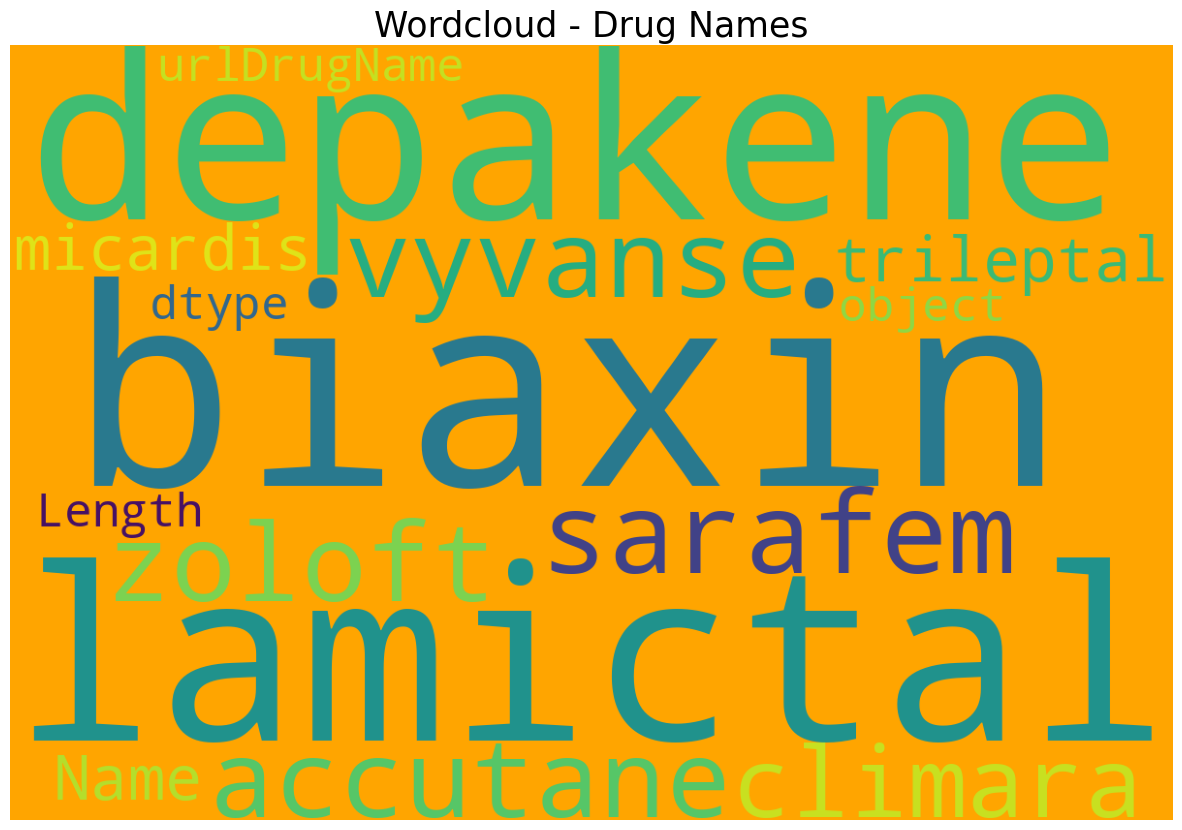

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color= 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df['urlDrugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Wordcloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

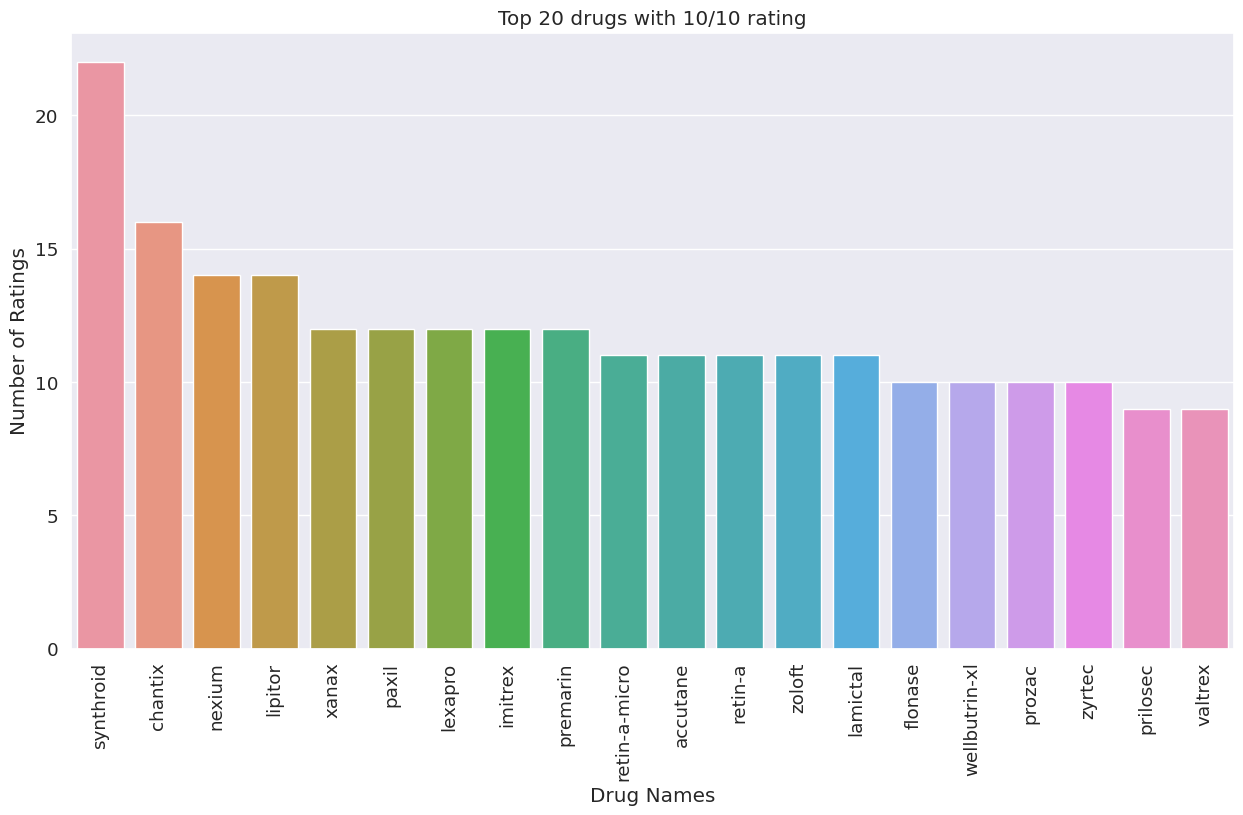

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "urlDrugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel('Number of Ratings')
sns_rating.set_xlabel('Drug Names')
plt.setp(sns_rating.get_xticklabels(), rotation = 90);

This is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Synthroid' is the drug with the highest number of 10/10 rating.

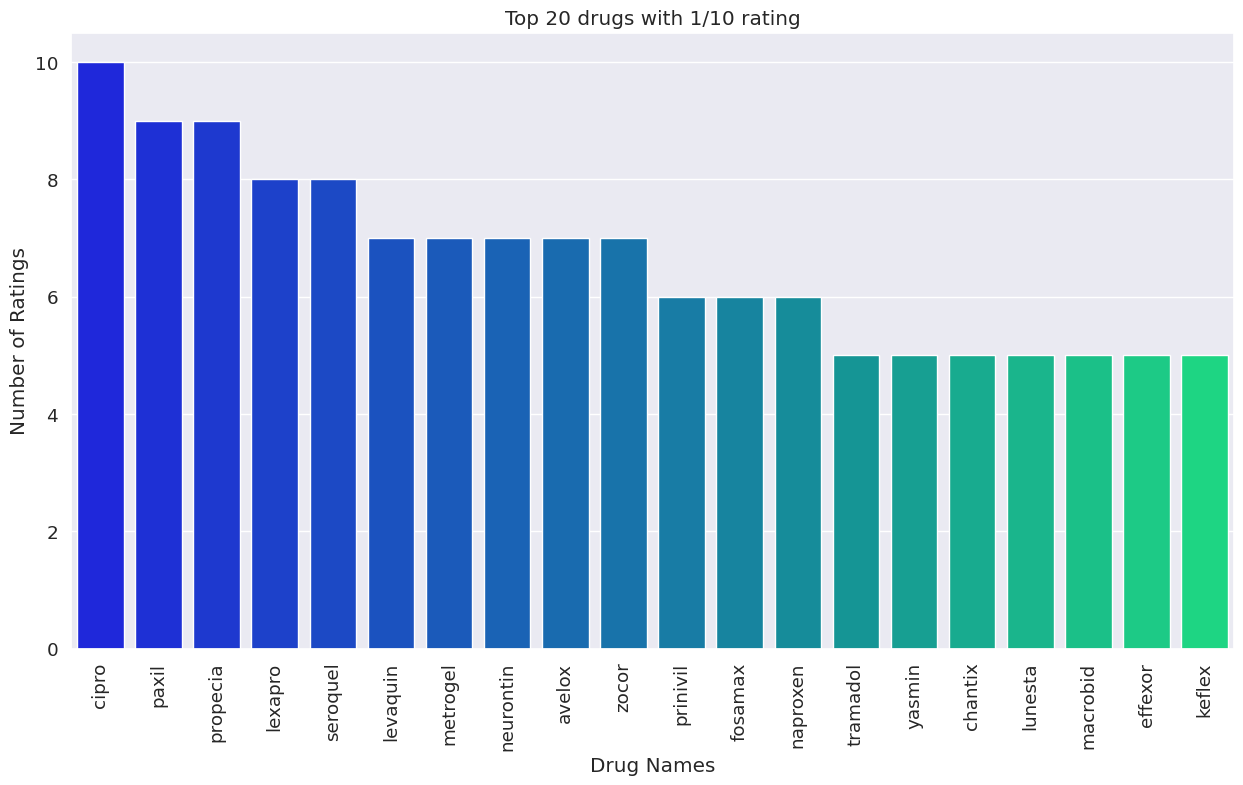

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "urlDrugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel('Number of Ratings')
sns_rating.set_xlabel('Drug Names')
plt.setp(sns_rating.get_xticklabels(), rotation = 90);

this is a bar graph that shows the top 20 drugs given in the data set with a rating of 1/10. 'Cipro' is the drug with the highest number of 1/10 rating about 10.

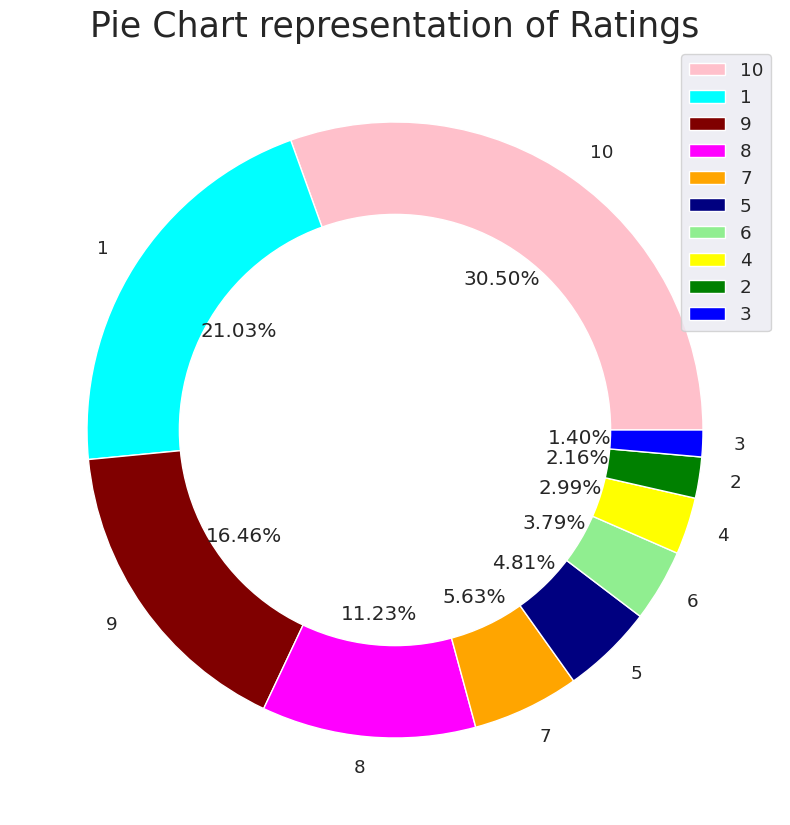

In [ ]:
#making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671, 4811, 3119]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow', 'green', 'blue']

labels = "10", "1", "9", "8", "7", "5", "6", "4", "2", "3"

my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()



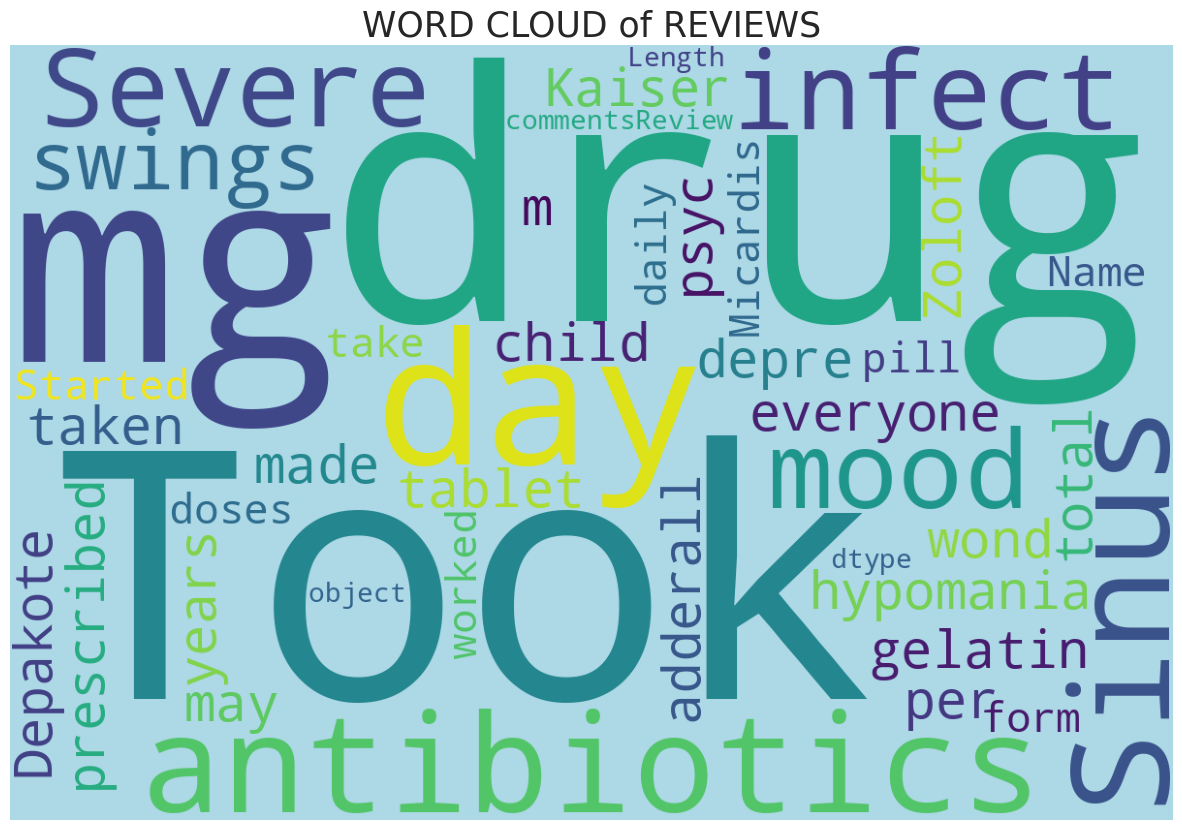

In [ ]:
#let see the words cloud for the reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(df['commentsReview']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD of REVIEWS', fontsize = 25)
print(wordcloud)

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is a word cloud for the reviews


In [ ]:
#let's make a new column review sentiment

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

<ipython-input-18-e51fd4e0f925>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1


1.0    3235
0.0     897
Name: Review_Sentiment, dtype: int64

In [ ]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...,1.0
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...,1.0
...,...,...,...,...,...,...,...,...,...,...
4138,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...",1.0
4139,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...,0.0
4140,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin...",0.0
4141,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines...",1.0


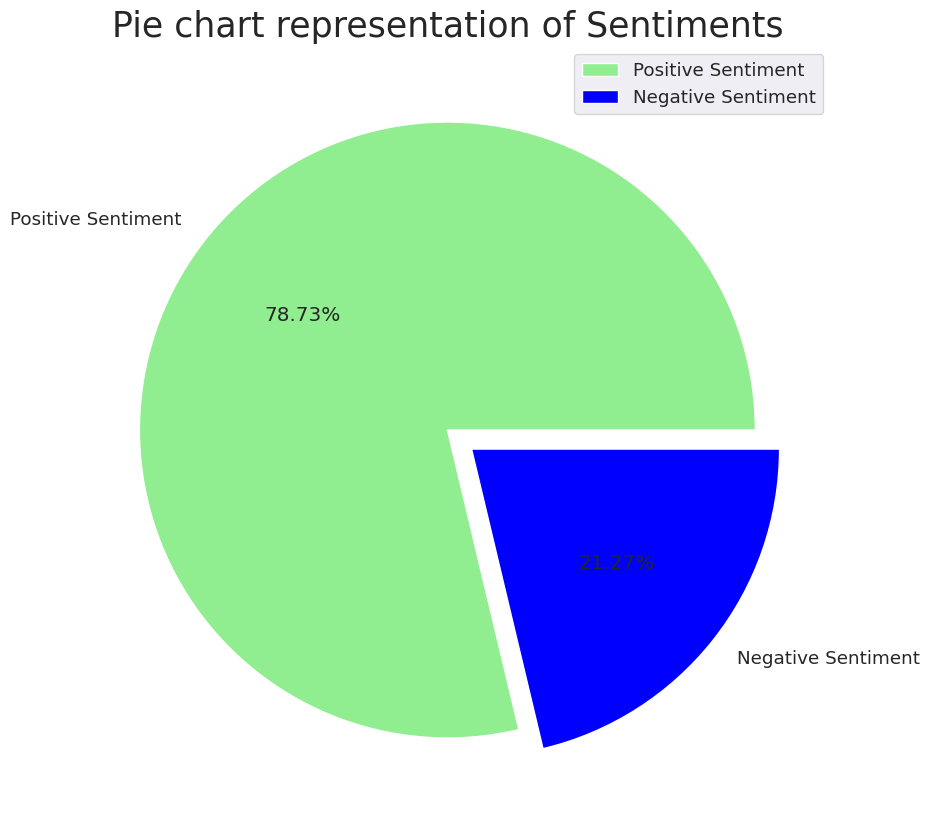

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [2446, 661]
colors = ['lightgreen', 'blue']
labels = "Positive Sentiment", "Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie chart representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

This pie chart represents the sentiments of the reviews


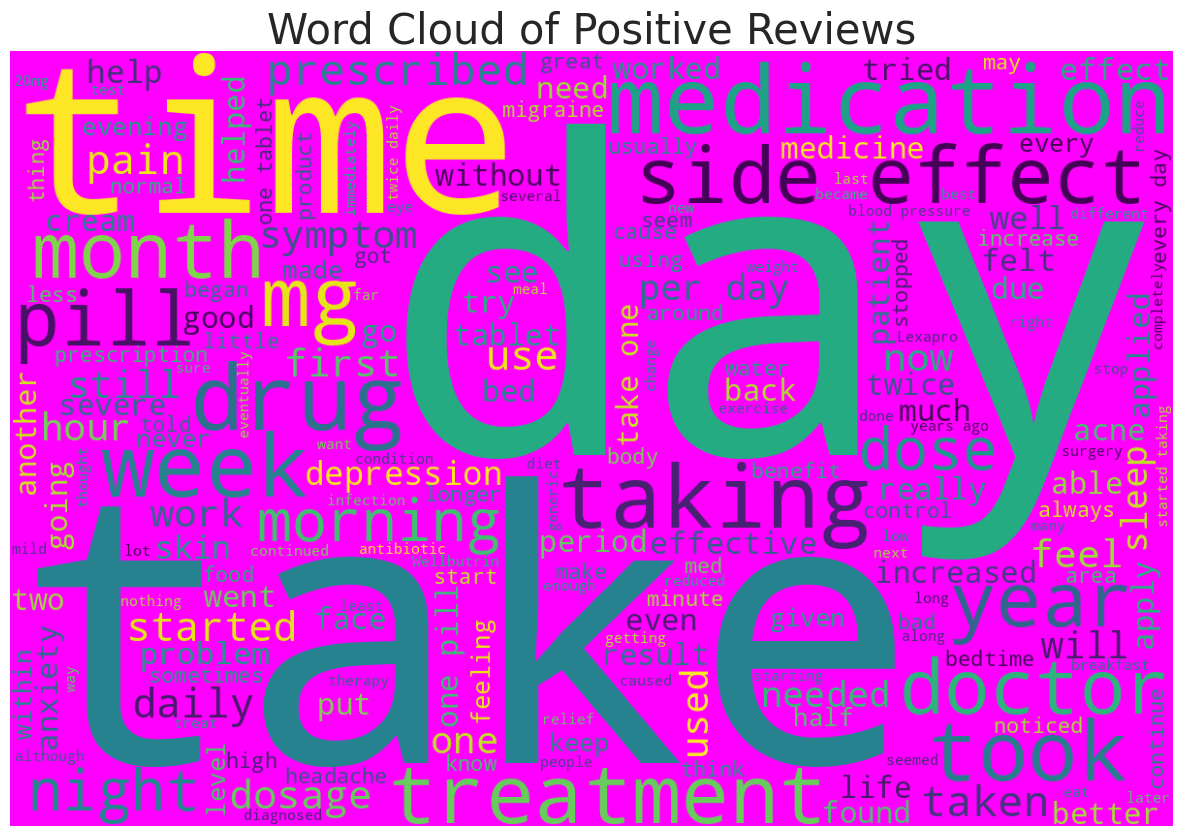

In [ ]:
#making words cloud for the positive sentiments

positive_sentiments = " ".join([text for text in df['commentsReview'][df['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS


stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is word cloud for the positive sentiments


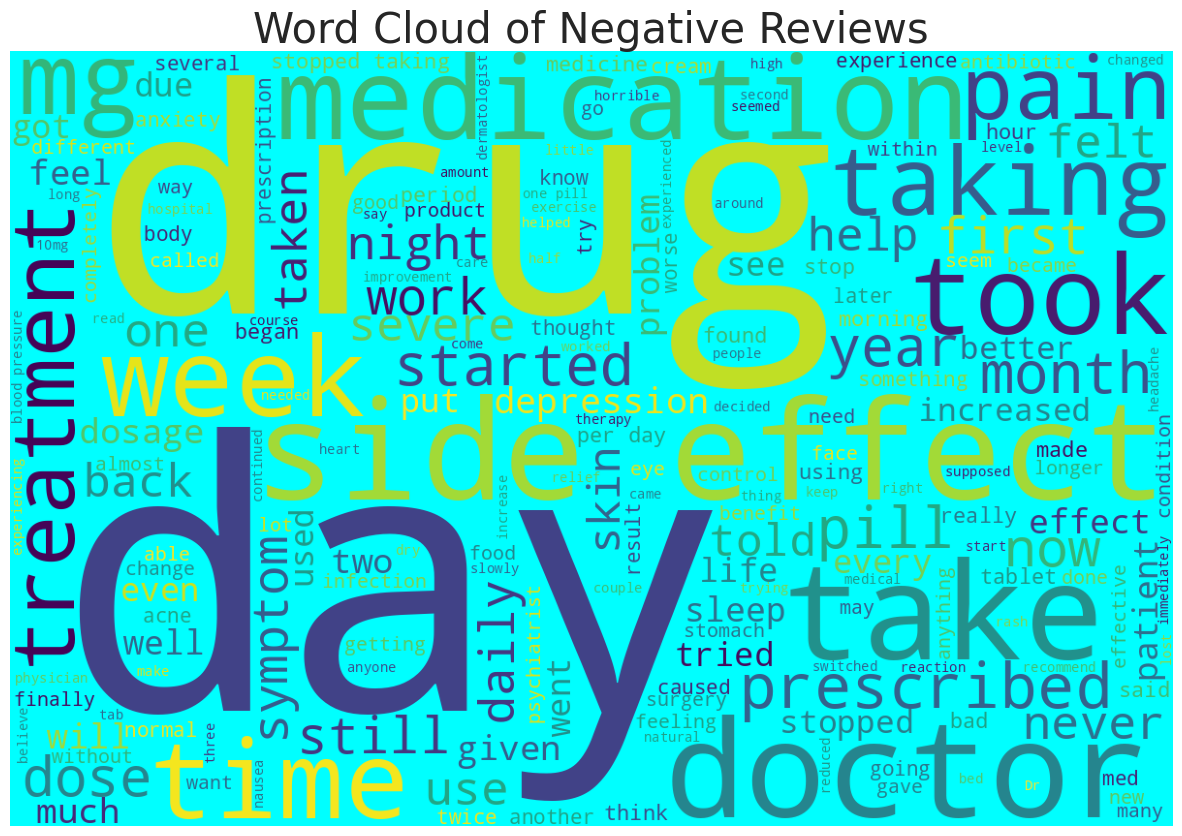

In [ ]:
negative_sentiments = " ".join([text for text in df['commentsReview'][df['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is a word cloud for the negative sentiments

Now we will try to filter the reviews by removing some things from the sentences, in order to make it more simple to understand by the model. You can find what we have removed below from all the reviews.

In [ ]:
def review_clean(review):
  #changing to lower case
  lower = review.str.lower()

  #replacing the repeating pattern of &#039;
  pattern_remove = lower.str.replace("&#039;", "")

  #removing all the special characters
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]', ' ')

  #removing all the non ASCII characters
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+', ' ')

  #removing the leading and trailing whitespaces
  whitespace_remove = ascii_remove.str.replace(r'\s+', ' ')

  #Replacing multiple spaces with single space
  multiw_remove = whitespace_remove.str.replace(r'\s+', ' ')

  #Replacing two or more dots with one
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

  return dataframe



In [ ]:
#df['review_clean_cr'] = review_clean(df['commentsReview'])
df['review_clean'] = review_clean(df['Review'])

<ipython-input-23-d36000f14e0e>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]', ' ')
<ipython-input-23-d36000f14e0e>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+', ' ')
<ipython-input-23-d36000f14e0e>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'\s+', ' ')
<ipython-input-23-d36000f14e0e>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+', ' ')
<ipython-input-23-d36000f14e0e>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
<ipython-input-24-10a04b970a58>:2: Setting

Again installing some more required libraries

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#removing the stopwords

stop_words = set(stopwords.words('english'))
#df['review_clean_cr'] = df['review_clean_cr'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


i hvae used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned reviews.


In [ ]:
#removing the word stems using the snowball stemmer
Snow_ball = SnowballStemmer("english")

#df['review_clean_cr'] = df['review_clean_cr'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
df['review_clean'] = df['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))




In [ ]:
df.head(3)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment,review_clean
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0,antibiot may destroy bacteria caus sinus infec...
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0,lamict stabil serious mood swing one minut cla...
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0,initi benefit compar brand name version drug d...


In [ ]:
def sentiment(review):
  #sentiment polarity of the review
  pol = []
  for i in review:
    analysis = TextBlob(i)
    pol.append(analysis.sentiment.polarity)

  return pol

In [ ]:
df['sentiment'] = sentiment(df['Review'])
#df

In [ ]:
df['sentiment_clean'] = sentiment(df['review_clean'])
#df

In [ ]:
#cleaning the reviews without removing the stop words and using snowball stemmer

df['review_clean_ss_1'] = review_clean(df['Review'])
df['sentiment_clean_ss_1'] = sentiment(df['review_clean_ss_1'])
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment,review_clean,sentiment,sentiment_clean,review_clean_ss_1,sentiment_clean_ss_1
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0,antibiot may destroy bacteria caus sinus infec...,-0.145833,-0.163889,the antibiotic may have destroyed bacteria cau...,-0.145833
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0,lamict stabil serious mood swing one minut cla...,0.208502,0.050607,lamictal stabilized my serious mood swings one...,0.208502
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0,initi benefit compar brand name version drug d...,-0.041862,-0.020031,initial benefits were comparable to the brand ...,-0.041862
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...,1.0,control mood swing help think act speak contro...,0.384133,0.028093,it controlls my mood swings it helps me think ...,0.361911
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...,1.0,within one week treatment superfici acn lesion...,0.126831,0.164545,within one week of treatment superficial acne ...,0.126831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...",1.0,increas focus attent product better abl pay at...,0.193519,0.152564,increased focus attention productivity better ...,0.183796
4139,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...,0.0,emot somewhat blunt less moodi weight gain ext...,-0.049961,-0.071746,emotions were somewhat blunted less moodiness ...,-0.049961
4140,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin...",0.0,constant issu patch stay call manufactur bayer...,0.061340,0.248295,constant issues with the patch not staying on...,0.061340
4141,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines...",1.0,control complex partial seizur dizzi fatigu na...,-0.100000,-0.200000,controlled complex partial seizures dizziness ...,-0.100000


In [ ]:
df = df.dropna(how='any', axis = 0)

In [ ]:
#word count in each review
df['count_word_1'] = df['review_clean_ss_1'].apply(lambda x: len(str(x).split()))

#unique word count
df['count_unique_word_1'] = df['review_clean_ss_1'].apply(lambda x: len(set(str(x).split())))

#letter count
df['count_letters_1'] = df['review_clean_ss_1'].apply(lambda x: len(str(x)))

#puntuation count
df['count punctuations_1'] = df['Review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df['count_words_upper_1'] = df['Review'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df['count_words_title_1'] = df['Review'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df['count_stopwords_1'] = df['Review'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#average length of the words
df['mean_word_len_1'] = df["review_clean_ss_1"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



the new features are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count, 'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review.

In [ ]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview', 'Review',
       'Review_Sentiment', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss_1', 'sentiment_clean_ss_1', 'count_word_1',
       'count_unique_word_1', 'count_letters_1', 'count punctuations_1',
       'count_words_upper_1', 'count_words_title_1', 'count_stopwords_1',
       'mean_word_len_1'],
      dtype='object')

In [ ]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment,...,review_clean_ss_1,sentiment_clean_ss_1,count_word_1,count_unique_word_1,count_letters_1,count punctuations_1,count_words_upper_1,count_words_title_1,count_stopwords_1,mean_word_len_1
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0,...,the antibiotic may have destroyed bacteria cau...,-0.145833,44,37,237,9,0,5,19,4.386364
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0,...,lamictal stabilized my serious mood swings one...,0.208502,396,219,2138,62,21,46,181,4.398990
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0,...,initial benefits were comparable to the brand ...,-0.041862,397,213,2407,62,20,49,174,5.062972
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...,1.0,...,it controlls my mood swings it helps me think ...,0.361911,75,52,385,15,11,9,35,4.133333
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...,1.0,...,within one week of treatment superficial acne ...,0.126831,111,78,688,19,0,11,36,5.198198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...",1.0,...,increased focus attention productivity better ...,0.183796,190,121,994,37,12,14,74,4.231579
4139,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...,0.0,...,emotions were somewhat blunted less moodiness ...,-0.049961,441,207,2305,65,35,61,220,4.226757
4140,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin...",0.0,...,constant issues with the patch not staying on...,0.061340,137,97,708,32,9,14,64,4.160584
4141,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines...",1.0,...,controlled complex partial seizures dizziness ...,-0.100000,68,51,359,12,2,7,28,4.279412


now we will make a correlation matrix

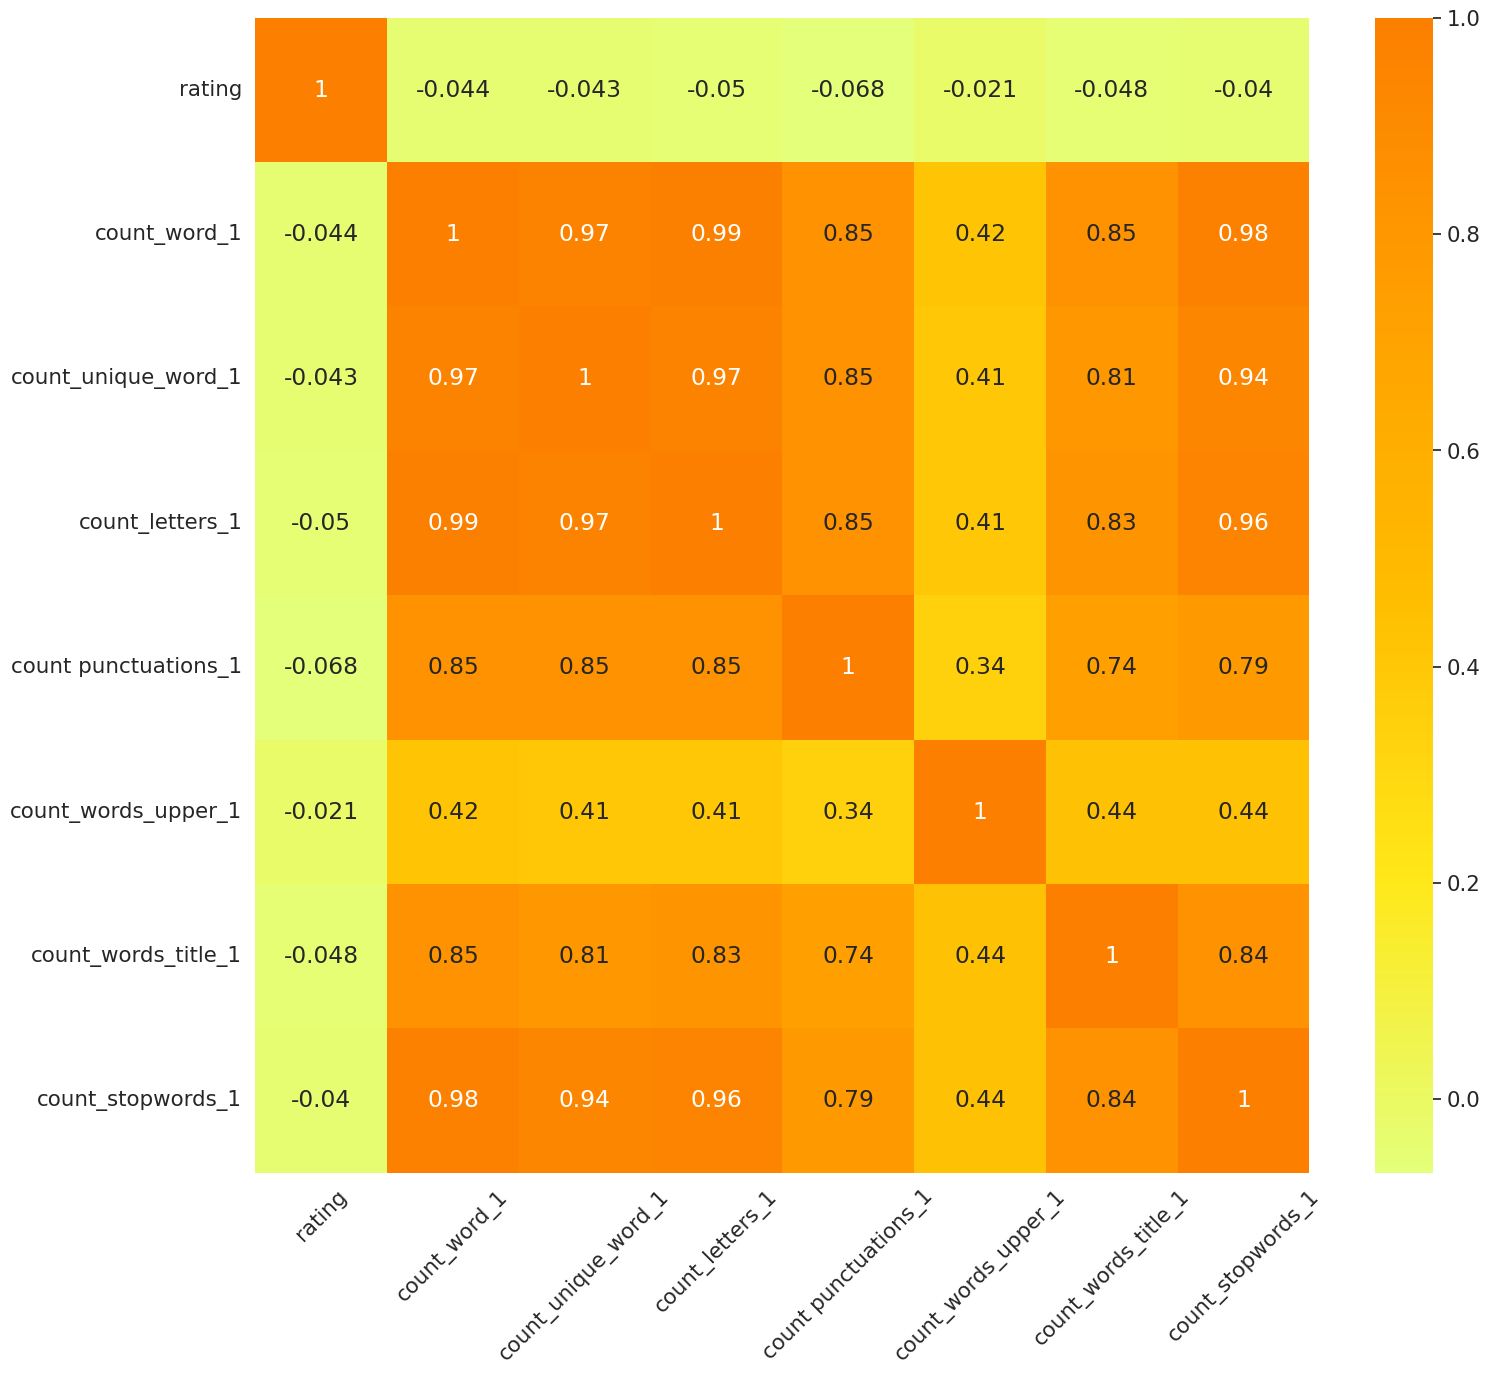

In [ ]:
#correlation heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17, 15]
sns.set(font_scale = 1.4)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

correlation heatmap is plotted using seaborn which contains all the new features engineered and the old features

In [ ]:
#label encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder

label_encoder_feat = {}
for feature in ['urlDrugName', 'condition']:
  label_encoder_feat[feature] = LabelEncoder()
  df[feature] = label_encoder_feat[feature].fit_transform(df[feature])




In [ ]:
df_1 = df.drop(columns = ['effectiveness', 'sideEffects',
       'benefitsReview', 'sideEffectsReview', 'commentsReview', 'Review','review_clean','review_clean_ss_1'])

In [ ]:
df_1.columns

Index(['urlDrugName', 'rating', 'condition', 'Review_Sentiment', 'sentiment',
       'sentiment_clean', 'sentiment_clean_ss_1', 'count_word_1',
       'count_unique_word_1', 'count_letters_1', 'count punctuations_1',
       'count_words_upper_1', 'count_words_title_1', 'count_stopwords_1',
       'mean_word_len_1'],
      dtype='object')

the label encoder is used to change the categorical values of Drug names and the conditions in to numerical values for the machine learning moddelling.

LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. it has many adavantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df_1)
scaled_df = pd.DataFrame(scaler_data, columns = df_1.columns)

In [ ]:
scaled_df

,urlDrugName,rating,condition,Review_Sentiment,sentiment,sentiment_clean,sentiment_clean_ss_1,count_word_1,count_unique_word_1,count_letters_1,count punctuations_1,count_words_upper_1,count_words_title_1,count_stopwords_1,mean_word_len_1
0,-1.328064,0.695525,1.451332,0.526574,-1.425363,-1.296917,-1.437097,-0.962414,-1.065856,-0.991372,-0.729546,-0.512495,-0.681807,-0.892801,-0.167762
1,-0.246366,0.695525,-0.949209,0.526574,0.960834,-0.069631,0.978960,3.423643,3.613603,3.544465,3.327943,1.274749,3.819606,3.214712,-0.141361
2,-0.977919,-1.000598,-0.949209,-1.899070,-0.725188,-0.473802,-0.728160,3.436104,3.459335,4.186306,3.327943,1.189642,4.148978,3.037227,1.247016
3,0.854090,1.034750,-0.966234,0.526574,2.143588,-0.198447,2.024990,-0.576142,-0.680186,-0.638240,-0.270208,0.423681,-0.242645,-0.487121,-0.696845
4,-1.778250,1.034750,0.713577,0.526574,0.410838,0.582295,0.422082,-0.127568,-0.011692,0.084726,0.036018,-0.512495,-0.023063,-0.461766,1.529771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1.373054,1.034750,-1.319978,0.526574,0.859933,0.513741,0.810504,0.856803,1.093894,0.814850,1.414033,0.508787,0.306308,0.501725,-0.491415
4128,1.516864,-2.018272,-0.557631,-1.899070,-0.779732,-0.769701,-0.783387,3.984361,3.305067,3.942931,3.557612,2.466245,5.466465,4.203558,-0.501496
4129,-1.140486,-1.679047,1.805076,-1.899070,-0.030199,1.061489,-0.024475,0.196402,0.476823,0.132446,1.031251,0.253467,0.306308,0.248175,-0.639864
4130,1.197982,0.356301,-0.368463,0.526574,-1.116708,-1.503535,-1.124579,-0.663365,-0.705897,-0.700277,-0.499877,-0.342281,-0.462226,-0.664606,-0.391397


In [ ]:
from sklearn.decomposition import PCA

num_components = 5
pca = PCA(n_components = num_components)
pca_result = pca.fit_transform(scaler_data)
pca_df = pd.DataFrame(pca_result, columns = [f'PC{i+1}' for i in range(num_components)])

print("Oriinal Dataframe")
print(df_1)

print("\nStandardized Dataframe")
print(scaled_df)

print("\nPCAResult")
print(pca_df)

print("\nExplained Variance Ratio")
print(pca.explained_variance_ratio_)


Oriinal Dataframe
      urlDrugName  rating  condition  Review_Sentiment  sentiment  \
0              76       9       1535               1.0  -0.145833   
1             249       9        266               1.0   0.208502   
2             132       4        266               0.0  -0.041862   
3             425      10        257               1.0   0.384133   
4               4      10       1145               1.0   0.126831   
...           ...     ...        ...               ...        ...   
4138          508      10         70               1.0   0.193519   
4139          531       1        473               0.0  -0.049961   
4140          106       2       1722               0.0   0.061340   
4141          480       8        573               1.0  -0.100000   
4142          299       4        760               0.0  -0.001250   

      sentiment_clean  sentiment_clean_ss_1  count_word_1  \
0           -0.163889             -0.145833            44   
1            0.050607          

In [ ]:
target = df['Review_Sentiment']

In [ ]:
import seaborn as sns


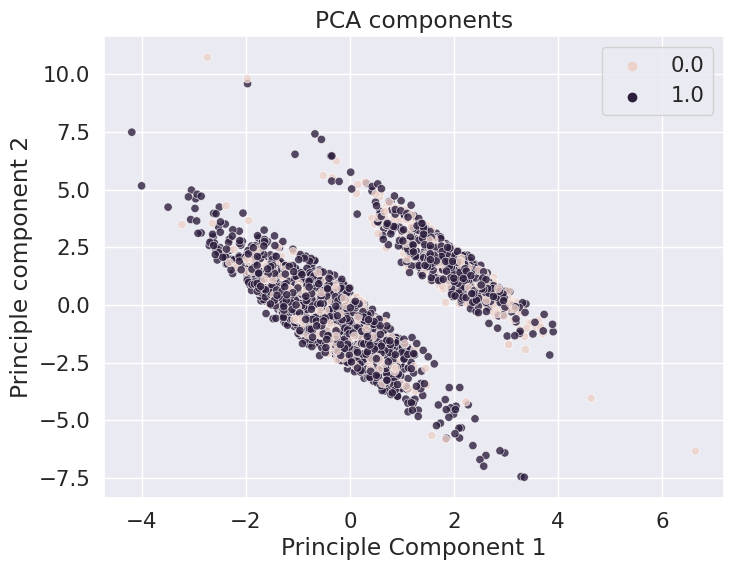

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'PC3', y= 'PC2', hue=df['Review_Sentiment'], data = pca_df, alpha = 0.8)
plt.title('PCA components')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle component 2')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#importing libraries for the machine learning model
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [ ]:
#defining features

#features = df[['condition', 'sentiment',
  #                 'sentiment_clean_ss_1', 'count_word_1', 'count_unique_word_1', 'count_letters_1', 'count_words_upper_1',
   #                'count_words_title_1', 'count_stopwords_1', 'mean_word_len_1']]

#target = df['Review_Sentiment']
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
#print(X_train.shape)
#print(X_test.shape)

IndentationError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, df['Review_Sentiment'], test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(2892, 5)
(1240, 5)


In [ ]:
#Training model - I
clf = LGBMClassifier(n_estimators= 10000,
                     learning_rate = 0.10,
                     num_leaves = 30,
                     subsample = .9,
                     max_depth = 7,
                     reg_alpha = 0.1,
                     reg_lambda = 0.1,
                     min_split_gain = 0.01,
                     min_child_weight=2,
                     silent = -1,
                     verbose=-1,
                     )

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print("the accuracy of the model is: ", accuracy_score(y_test, predictions))
print("the confusion matrix: ")
confusion_matrix(y_test, predictions)

the accuracy of the model is:  0.9975806451612903
the confusion matrix: 


array([[271,   2],
       [  1, 966]])

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

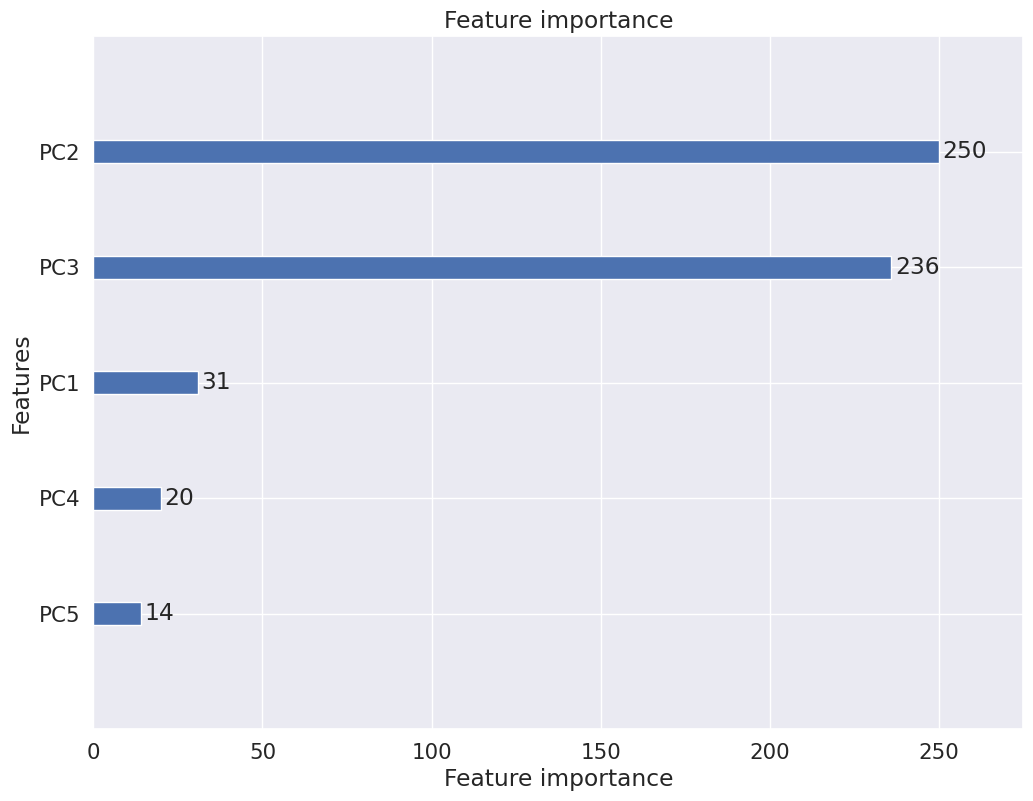

In [ ]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.4)
plot_importance(model)

In [ ]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview', 'Review',
       'Review_Sentiment', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss_1', 'sentiment_clean_ss_1', 'count_word_1',
       'count_unique_word_1', 'count_letters_1', 'count punctuations_1',
       'count_words_upper_1', 'count_words_title_1', 'count_stopwords_1',
       'mean_word_len_1'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#vectroize the reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Review'])

num_clusters = 10
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

#split data into clusters
clusters = df['cluster'].unique()

#predict ratings withing each cluster
for cluster in clusters:
  cluster_data = df[df['cluster'] == cluster]
  X = cluster_data['Review']
  y = cluster_data['rating']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  X_train_tfidf = tfidf_vectorizer.transform(X_train)
  X_test_tfidf = tfidf_vectorizer.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)

  mse = mean_squared_error(y_test, y_pred)
  print(f"Cluster {cluster} - Mean Squared Error: {mse}")





Cluster 6 - Mean Squared Error: 18.598623544541457
Cluster 0 - Mean Squared Error: 6.2277142346294045
Cluster 1 - Mean Squared Error: 12.228200548878625
Cluster 5 - Mean Squared Error: 20.908018450363404
Cluster 3 - Mean Squared Error: 6.155542995801887
Cluster 2 - Mean Squared Error: 9.823819180181353
Cluster 8 - Mean Squared Error: 5.420285926907981
Cluster 7 - Mean Squared Error: 4.659375928862487
Cluster 4 - Mean Squared Error: 11.092508350990775
Cluster 9 - Mean Squared Error: 4.42193142548557


In [ ]:
y_train

2270    10
1013     8
3442     8
3637     9
2522     7
        ..
1884     9
223      7
1708     2
2993     9
1830     9
Name: rating, Length: 201, dtype: int64

In [ ]:
#feat = np.array([[16, 0.047368, 0.047368, 120, 16, 808, 0, 0, 37, 5.733333]])
#feat_1 = np.array([[1325, 0.243056, 0.243056, 51, 48, 335, 0, 1, 14, 5.588235]])
#pred = model.predict(feat_1)
#print(pred)

ValueError: ignored

In [ ]:
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print(predictions_2)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

ValueError: ignored

In [ ]:
pred = {'result' : predictions}
data_1 = pd.DataFrame(pred)
data_1.to_csv('predict.csv')

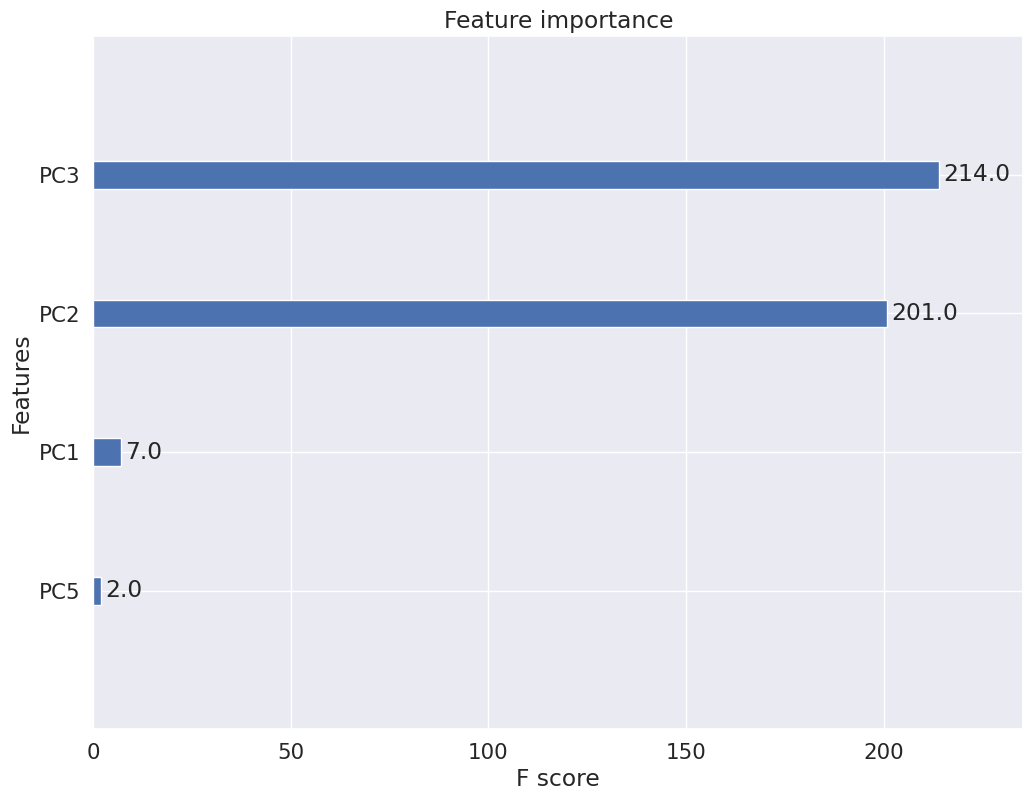

In [ ]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

KeyError: ignored

In [ ]:
#finding the most popular drug?

df['urlDrugName'].value_counts()

261    74
356    58
415    55
451    53
531    52
       ..
57      1
10      1
228     1
211     1
315     1
Name: urlDrugName, Length: 540, dtype: int64

In [ ]:
df['urlDrugName'].value_counts().nlargest(20)

261    74
356    58
415    55
451    53
531    52
400    51
167    46
168    46
4      44
97     44
391    43
510    42
264    42
124    41
249    39
147    38
319    38
320    37
160    36
469    35
Name: urlDrugName, dtype: int64

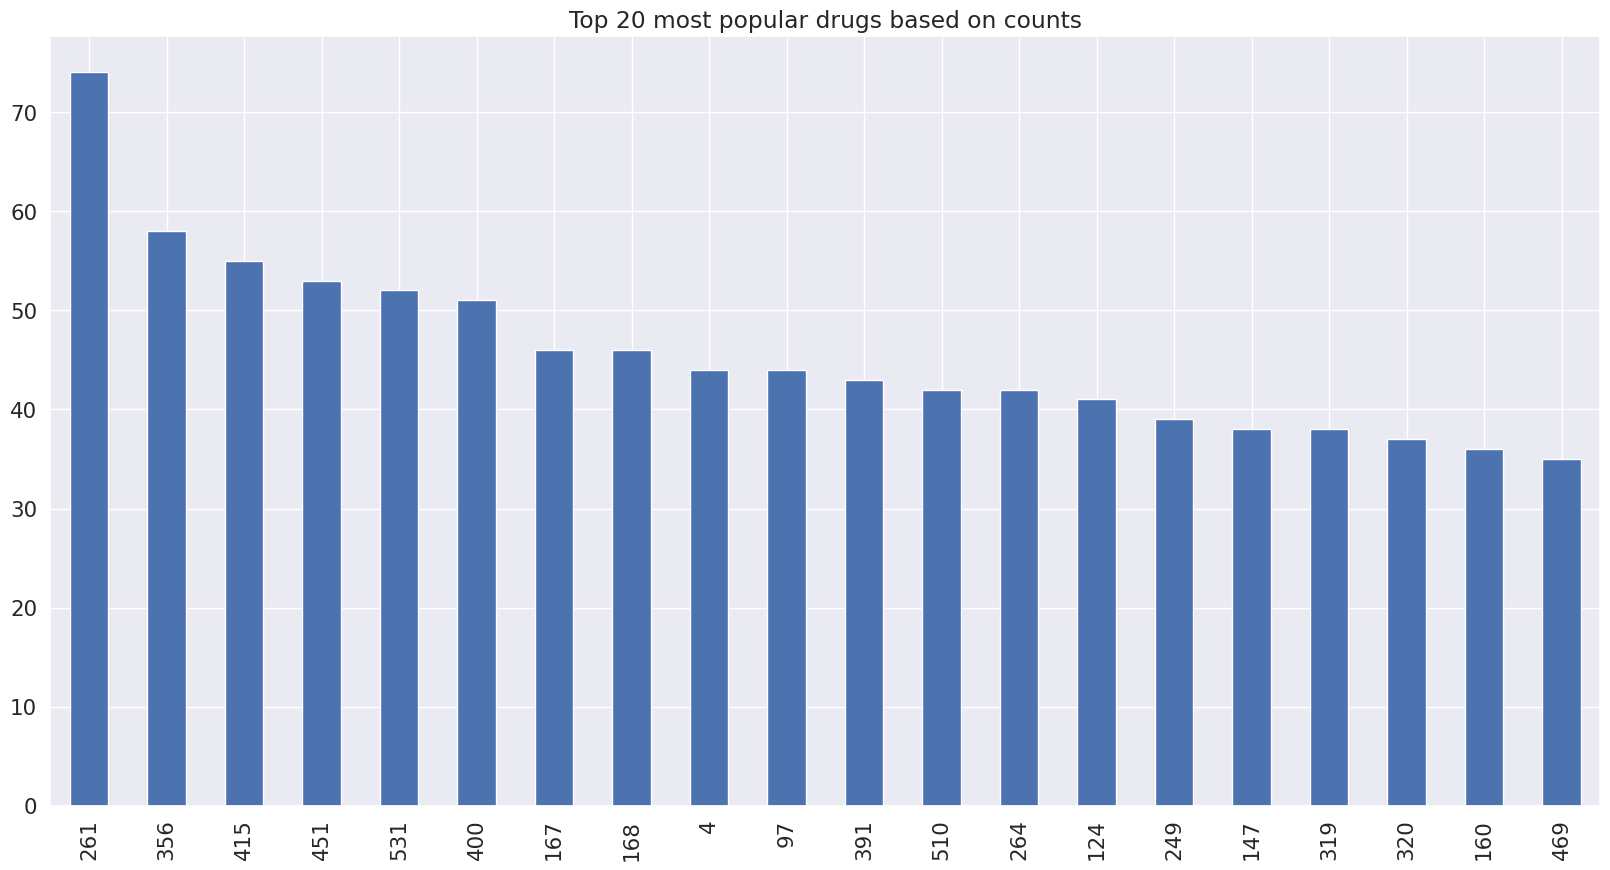

In [ ]:
#top 20 drugs(most popular)
plt.figure(figsize=(20,10))
df['urlDrugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 most popular drugs based on counts')
plt.show()

In [ ]:
df['urlDrugName'].value_counts().nsmallest(20)

In [ ]:
#Number of conditions
df['condition'].unique()

In [ ]:
len(df['condition'].unique().tolist())

In [ ]:
#distribution of conditions
df['condition'].value_counts()

In [ ]:
###most common conditions
df['condition'].value_counts().nlargest(20)

In [ ]:
df['condition'].value_counts().nlargest(20).plot(kind='bar', figsize=(20,10))

In [ ]:
#the most common condition is depression followed by acne, anxiety
df['condition'].value_counts().nsmallest(20)

In [ ]:
#how many drugs per condition(top 20)
df.groupby('condition')['urlDrugName'].nunique().nlargest(20)

In [ ]:
df['rating']

In [ ]:
df.groupby('rating').size()

In [ ]:
df.groupby('rating').size().plot(kind='bar')

In [ ]:
#most people rated at the extremes

avg_rating = df['rating'].groupby(df['urlDrugName']).mean()
avg_rating

In [ ]:
#average rating for all drugs

plt.figure(figsize = (20,10))
avg_rating.hist()
plt.title("Distribution of Average Rating for all drugs")
plt.show()

In [ ]:
#which drugs have the highest mean/average rating
avg_rating.nlargest(20)

In [ ]:
df.columns

In [ ]:
### question on Review
# how genuine is the review? (using sentiment analysis)
# how many reviews are positive, negative, neutral?
# correlation between rating and review and users who found the review useful?
# distribution of rating
# amount of review made per year and per month
# which condition has the most review on drugs
# can you predict the rating using the review?


In [ ]:
# how genuine is the review? (using sentiment analysis)

from textblob import TextBlob

In [ ]:
df['commentsReview']

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
  blob = TextBlob(text)
  if blob.polarity > 0:
    result = 'positve'
  elif blob.polarity < 0:
    result = 'negative'
  else:
    result = 'neutral'

  return result


In [ ]:
get_sentiment('I love grapes')

In [ ]:
get_sentiment_label('I love grapes')

In [ ]:
text =''
for i in range(len(df['commentsReview'])):
  text = (df['commentsReview'][i])
  i = i + 1
  print(i)
  print(text)

df['sentiment'] = df['commentsReview'].apply(get_sentiment(text))